# Set up Problem

In [712]:
from numpy import *
import matplotlib
from matplotlib.pyplot import *
from pandas import *

eps = 1e-9
sigma = 30
size = 2000

# Solve Problem

In [713]:

# here's the primal simplex algorithm
#
# Problem:    max c^T x
#             s.t. A  x <= b
#                     x >= 0
#


def pivot():
    global A, b, c, b0, c0, row, col, Arow, Acol, a, basics, nonbasics, iter
    j = nonbasics[col]              # the entering var's subscript
    i = basics[row]                 # the leaving var's subscript

    # update A matrix.  See section 5.4.
    Arow = A[row,:]                 # the row in A of the entering variable
    Acol = A[:,col]                 # the associated entering column
    a = A[row,col]                  # the pivot element
    A = A - Acol*Arow/a             # the out-of-row/out-of-col update formula
    A[row,:] = -Arow/a              # update formula for the row
    A[:,col] = Acol/a               # update formula for the col
    A[row,col] = 1/a                # update formula for the pivot element

    # update the right-hand side
    brow = b[row,0]
    b = b - brow*Acol/a
    b[row] = -brow/a

    # update the objective function
    ccol = c[0,col]
    c = c - ccol*Arow/a
    c[0,col] = ccol/a
    
    # update b0 and c0
    brow = b0[row,0]
    b0 = b0 - brow*Acol/a
    b0[row] = -brow/a
    
    ccol = c0[0,col]
    c0 = c0 - ccol*Arow/a
    c0[0,col] = ccol/a
    
    # swapping variables x_j and x_i position in the dictionary
    basics[row] = j         
    nonbasics[col] = i
    iter = iter+1    

# find entering (or leaving) variable

def solvelp():
    global A, b, c, b0, c0, m, n, row, col, iter, eps, basic, nonbasics
    A = -A
    
    iter = 0
    status = 'unknown'

    while ( True != False ):
        mu = -1/eps
        row = -1
        col = -1
        for j in arange(0,n):
            tmp = -c[0,j]/c0[0,j]
            if ((c[0,j] > eps) and (tmp > mu)):
                col = j
                row = -1
                mu = tmp
        for i in arange(0,m):
            tmp = -b[i,0]/b0[i,0]
            if ((b[i,0] < -eps) and (tmp > mu)):
                row = i
                col = -1
                mu = tmp
        if (mu <= eps):
            status = 'optimal'
            break
            
        if (row == -1):
            Acol = A[:,col]                 # the associate entering column
            tmp = -Acol/(b+mu*b0)                   # vector of ratios
            row = argmax(tmp)               # the leaving variable
            if (tmp[row] < eps): 
                status = 'dual infeasible'
                break
        elif (col == -1):
            Arow = A[row,:]                 # the row in A of the entering variable
            tmp = -Arow/(c+mu*c0)
            col = argmax(tmp)
            if (tmp[0,col] < eps):
                status = 'primal infeasible'
                break
        
        # print(row,col)
        if (iter>99997): 
            print('A = ',A)
            print('b = ',b)
            print('b0 = ',b0)
            print('c = ',c)
            print('c0 = ',c0)
            print('mu = ',mu)
            print('\n')
        if (iter>100000): break
        pivot()
        

                  
    print('iter = ',iter)
    print(status)

In [714]:
numprobs = 500
mniter = zeros((numprobs,3))
for k in arange(0,numprobs):
    print('k = ',k)
    m = int(exp(log(size)*random.rand()))
    n = int(exp(log(size)*random.rand()))

    #A  = 10*random.rand(m,n)-5  
    A  = sigma*random.randn(m,n)
    signA = sign(A)
    absA = ceil(abs(A))
    A  = matrix(signA*absA)
    x0 = matrix(sigma*random.rand(n,1))
    w0 = matrix(sigma*random.rand(m,1))
    y0 = matrix(sigma*random.rand(1,m))
    z0 = matrix(sigma*random.rand(1,n))
    b = A*x0 + w0
    c = y0*A - z0
    b0 =  matrix(sigma*random.rand(m,1))
    c0 = -matrix(sigma*random.rand(1,n))   # a row vector of random neg. numbers
    
    nonbasics = arange(n)   # original variables x_0, x_1, ..., x_{n-1}
    basics = n + arange(m)  # slack variables w_0 -> x_n, w_1 -> x_{n+1}, ..., w_{m-1} -> x_{n+m-1}

    solvelp()
    mniter[k,0] = m
    mniter[k,1] = n
    mniter[k,2] = iter

ugh="""
# seed = 10, genrandom  3 times
m = 3
n = 4
A = matrix([[-2, 6, -2, 5], [5, -3, -3, -1], [-3, 0, -1, -3]])
b = matrix([[8], [-12], [-1]])
c = matrix([2, -4, -5, -5])

# seed = 11
m = 3
n = 4
A = matrix([[2, 2, 0, -4], [2, -1, -2, 1], [2, -6, -1, 2]])
b = matrix([[1], [0], [-2]])
c = matrix([-5, -3, 2, -1])
"""

k =  0
iter =  769
optimal
k =  1
iter =  73
optimal
k =  2
iter =  193
optimal
k =  3
iter =  15
optimal
k =  4
iter =  4
optimal
k =  5
iter =  16
optimal
k =  6
iter =  399
optimal
k =  7
iter =  2
optimal
k =  8
iter =  84
optimal
k =  9
iter =  5
optimal
k =  10
iter =  14
optimal
k =  11
iter =  75
optimal
k =  12
iter =  8
optimal
k =  13
iter =  202
optimal
k =  14
iter =  89
optimal
k =  15
iter =  125
optimal
k =  16
iter =  15162
optimal
k =  17
iter =  14
optimal
k =  18
iter =  3
optimal
k =  19
iter =  80
optimal
k =  20
iter =  209
optimal
k =  21
iter =  2
optimal
k =  22
iter =  34729
optimal
k =  23
iter =  5
optimal
k =  24
iter =  5
optimal
k =  25
iter =  12
optimal
k =  26
iter =  47
optimal
k =  27
iter =  91
optimal
k =  28
iter =  270
optimal
k =  29
iter =  687
optimal
k =  30
iter =  1
optimal
k =  31
iter =  595
optimal
k =  32
iter =  148
optimal
k =  33
iter =  7
optimal
k =  34
iter =  14
optimal
k =  35
iter =  566
optimal
k =  36
iter =  23
optimal
k = 

iter =  371
optimal
k =  295
iter =  224
optimal
k =  296
iter =  79
optimal
k =  297
iter =  9
optimal
k =  298
iter =  2058
optimal
k =  299
iter =  89
optimal
k =  300
iter =  13313
optimal
k =  301
iter =  10
optimal
k =  302
iter =  74
optimal
k =  303
iter =  18565
optimal
k =  304
iter =  973
optimal
k =  305
iter =  67
optimal
k =  306
iter =  11
optimal
k =  307
iter =  11
optimal
k =  308
iter =  744
optimal
k =  309
iter =  145
optimal
k =  310
iter =  22
optimal
k =  311
iter =  133
optimal
k =  312
iter =  425
optimal
k =  313
iter =  4
optimal
k =  314
iter =  16
optimal
k =  315
iter =  10
optimal
k =  316
iter =  20
optimal
k =  317
iter =  6
optimal
k =  318
iter =  60
optimal
k =  319
iter =  19
optimal
k =  320
iter =  411
optimal
k =  321
iter =  1893
optimal
k =  322
iter =  5
optimal
k =  323
iter =  145
optimal
k =  324
iter =  514
optimal
k =  325
iter =  27
optimal
k =  326
iter =  70
optimal
k =  327
iter =  9
optimal
k =  328
iter =  52
optimal
k =  329
iter 

# Answer

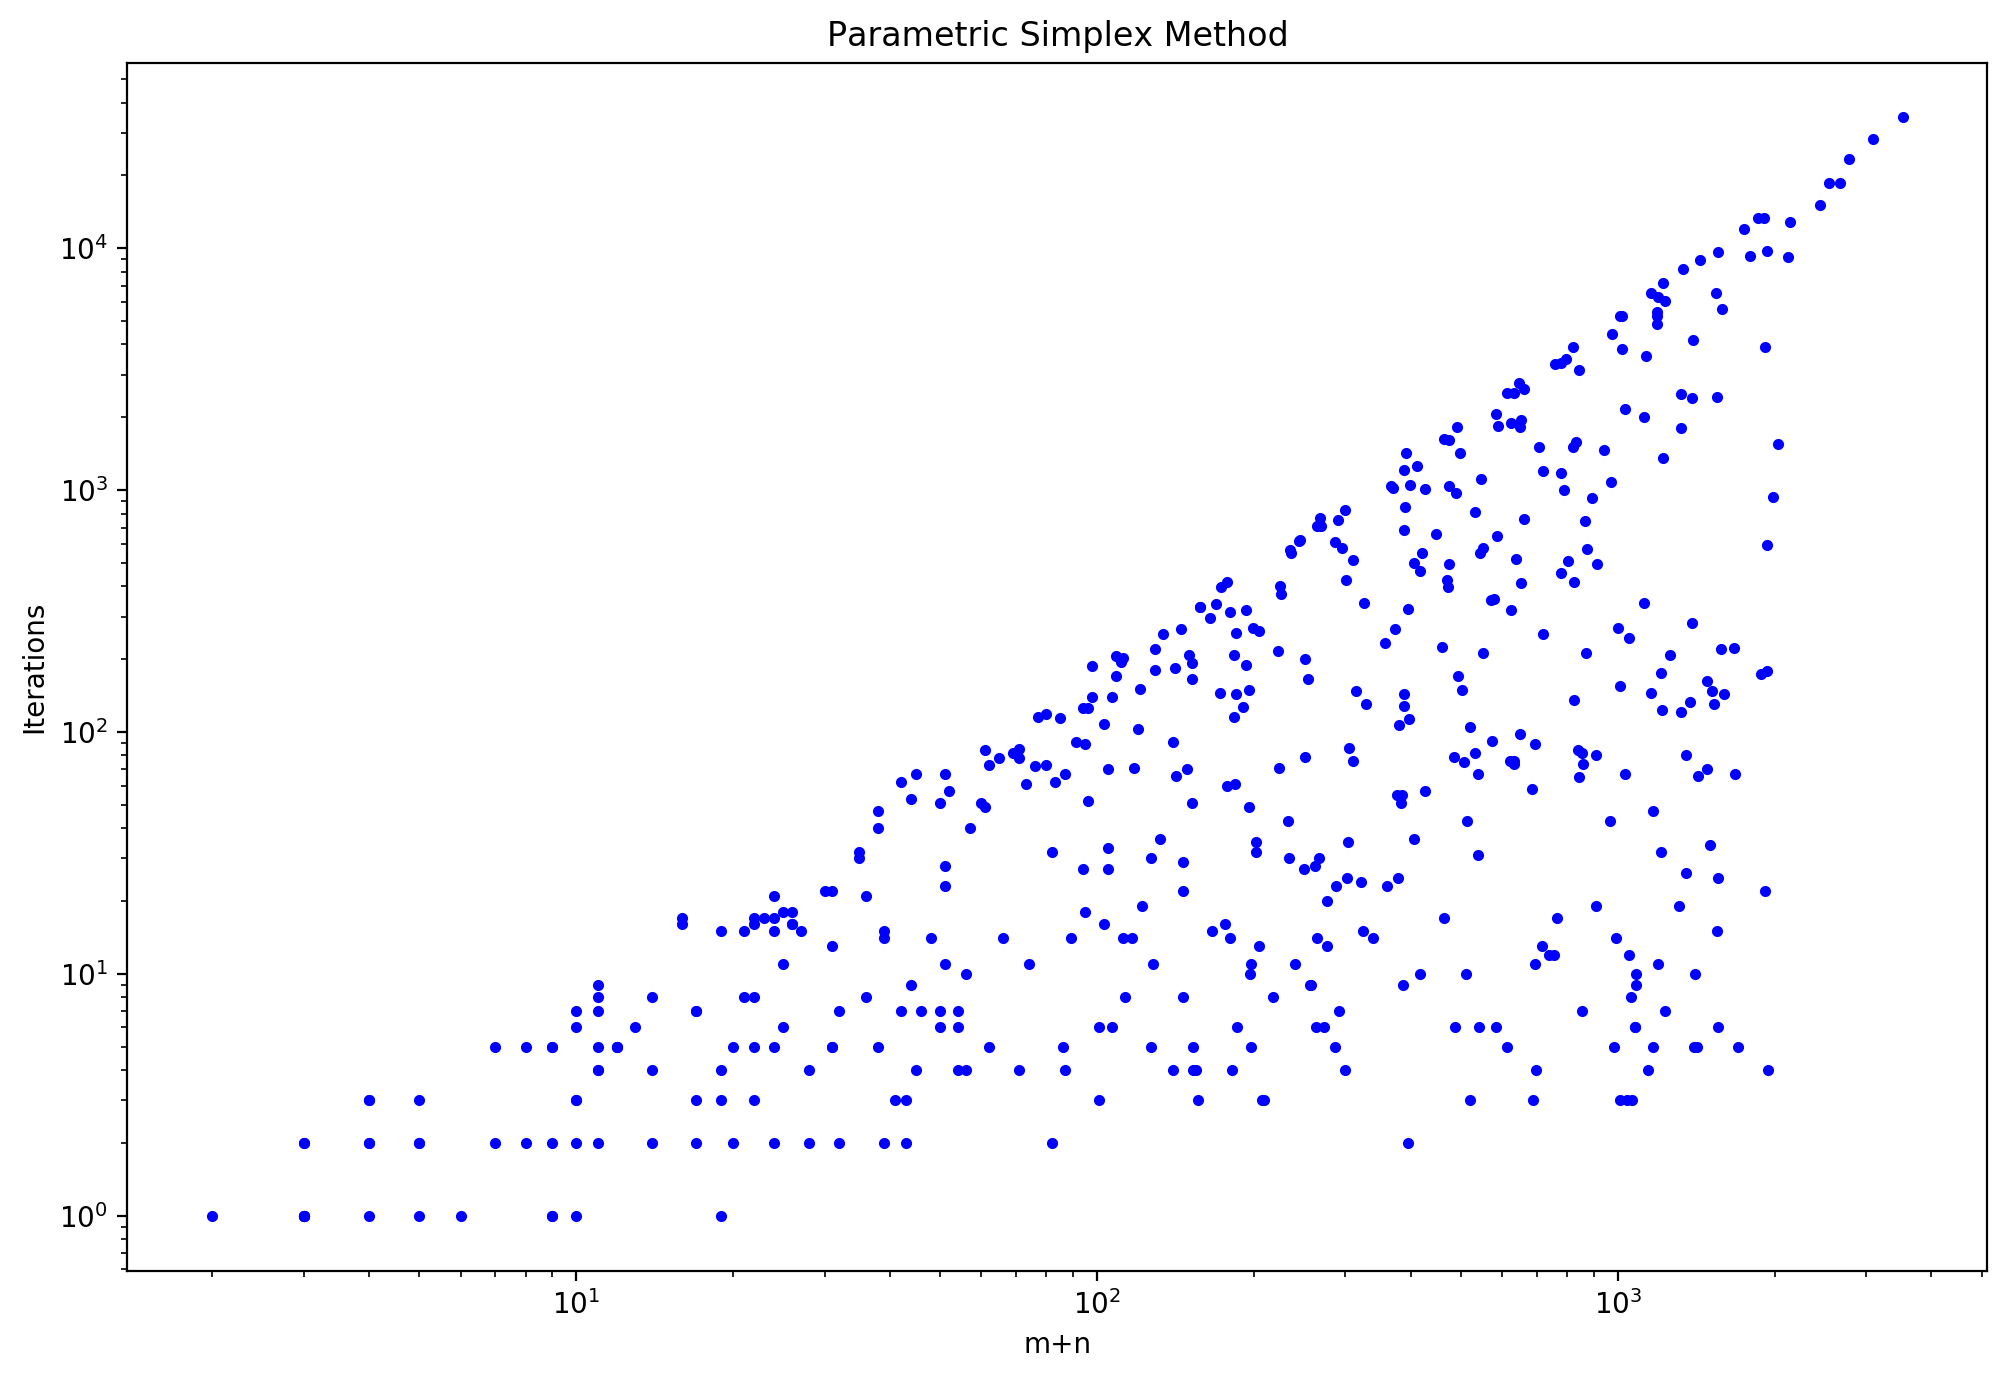

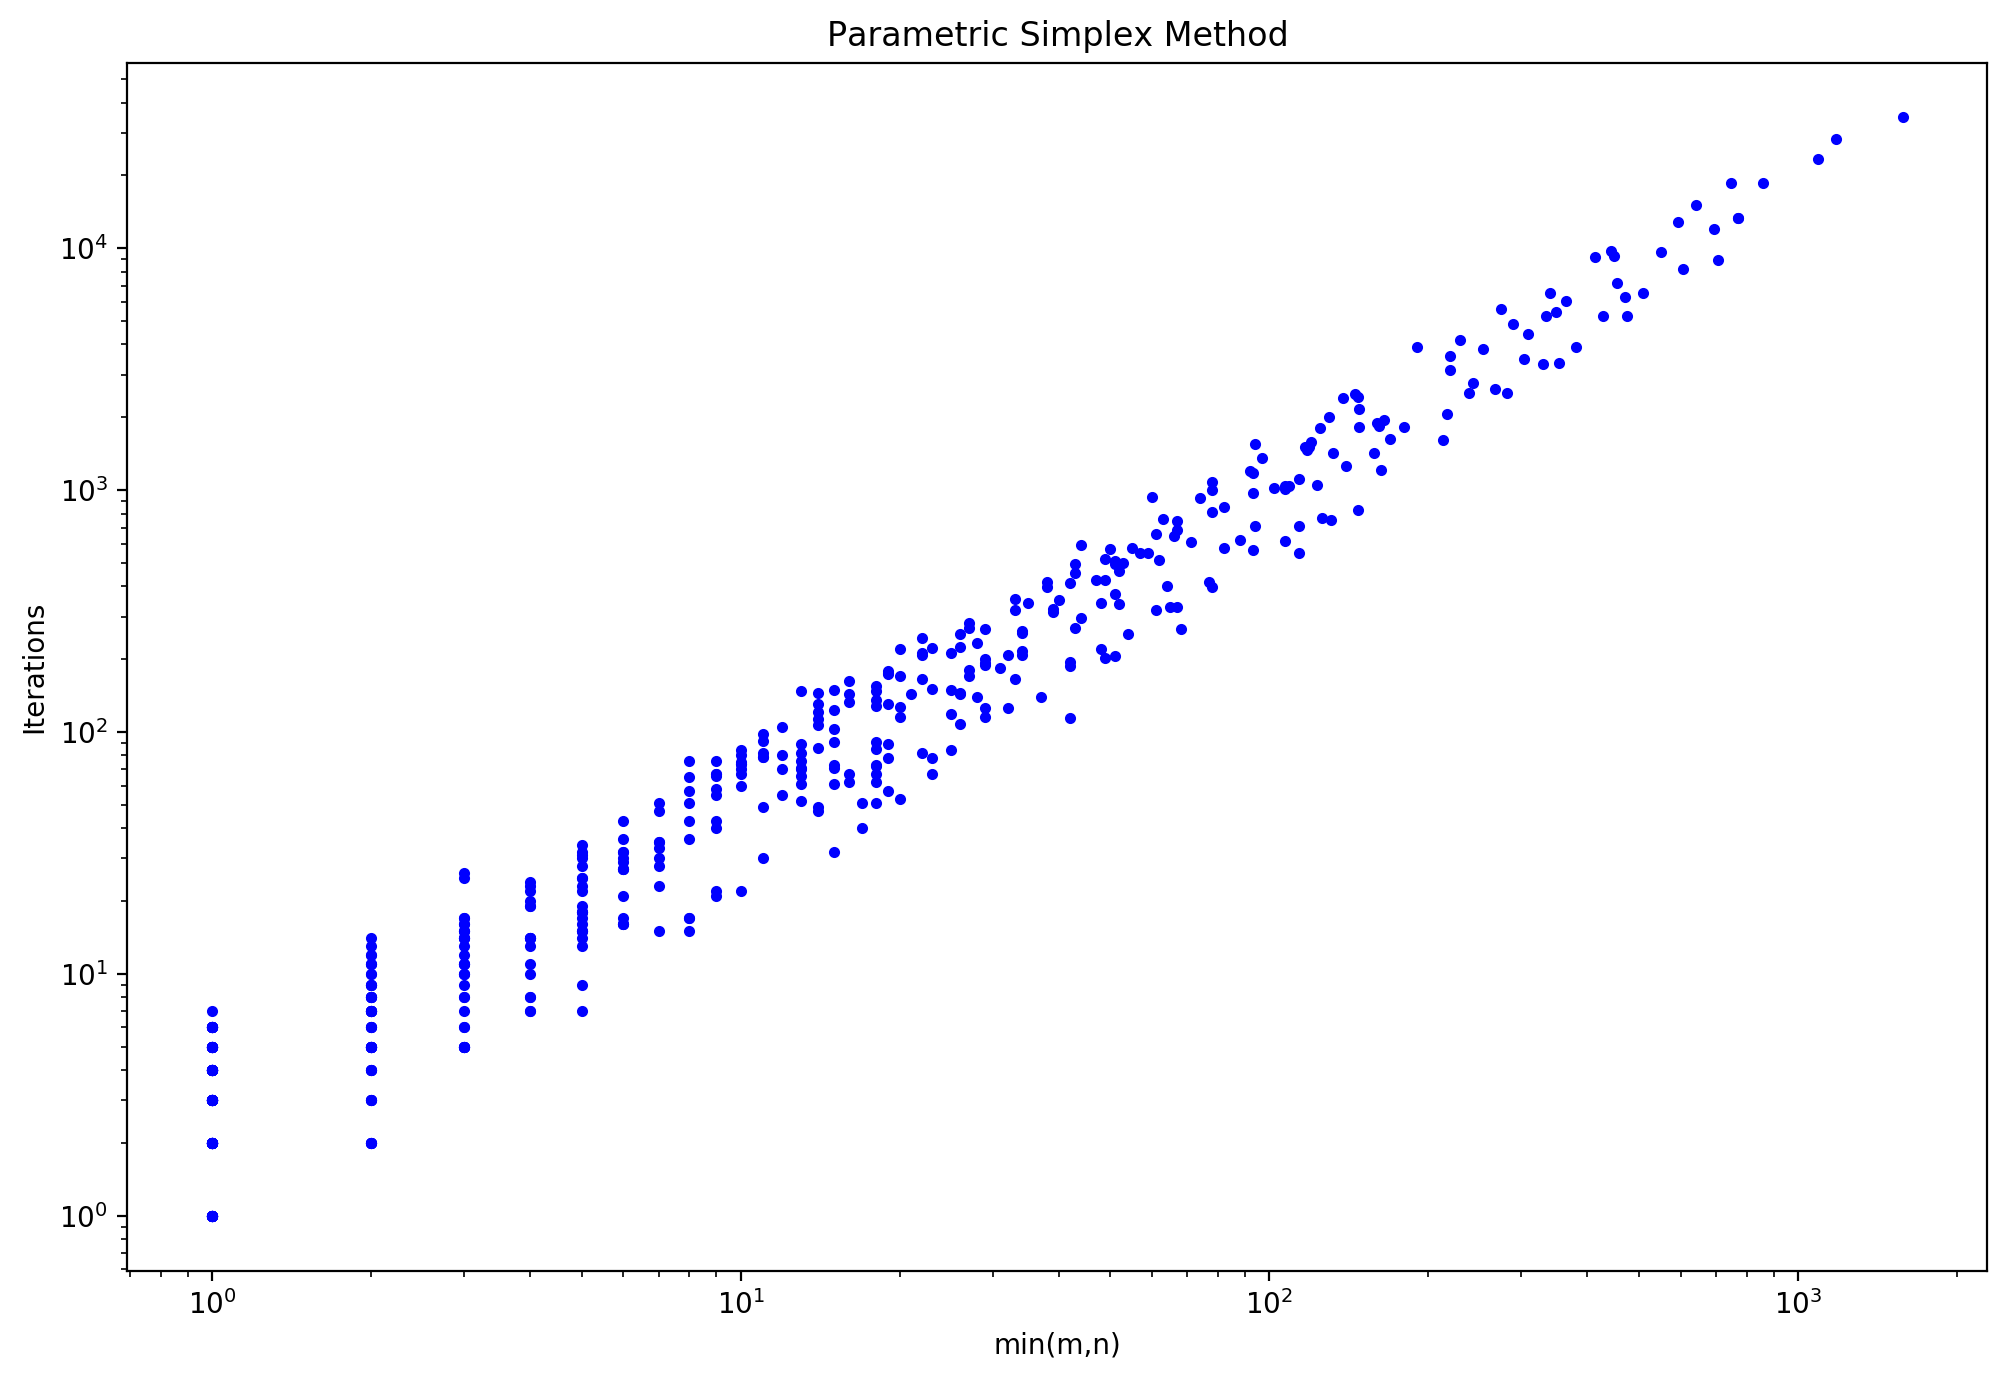

In [715]:
ms = mniter[:,0]
ns = mniter[:,1]
iters = mniter[:,2]

figure(1, figsize=(12, 8), dpi= 200)
loglog(ms+ns,iters,'b.')
xlabel('m+n')
ylabel('Iterations')
title('Parametric Simplex Method')
show()

figure(2, figsize=(12, 8), dpi= 200)
loglog(minimum(ms,ns),iters,'b.')
xlabel('min(m,n)')
ylabel('Iterations')
title('Parametric Simplex Method')
show()

In [768]:
#from amplpy import AMPL, DataFrame
#ampl = AMPL() #this creates an ampl object using your ampl installation
#ampl.setOption('solver', 'loqo') #this selects solver used for problem

from amplpy import AMPL, DataFrame, ErrorHandler
ampl = AMPL()
ampl.setOption('solver','loqo')
ampl.eval('''option loqo_options "verbose=0 sigfig=12";''')

class MyErrorHandler(ErrorHandler):
    def error(self, exception):
        print('Error:', exception.getMessage())

    def warning(self, exception):
        print('Warning:', exception.getMessage())

errorHandler = MyErrorHandler()
ampl.setErrorHandler(errorHandler)

In [769]:
ampl.eval('''
    param n;
    param m_and_n {1..n};
    param iters {1..n};
    
    param pow;
    var loga;
    var b;
    var eps {1..n};
    var abs_eps {1..n} >= 0;
    
    minimize sumerror:  sum {j in 1..n} abs_eps[j]^pow;
    
    subject to lo_bnd {j in 1..n}:  -abs_eps[j] <= log(iters[j]) - loga - b*log(m_and_n[j]);
    subject to up_bnd {j in 1..n}:                 log(iters[j]) - loga - b*log(m_and_n[j]) <= abs_eps[j];
''')

In [772]:
n = len(ms)
ampl.getParameter('n').set(n)

iters0 = ampl.getParameter('iters')
for i in range(1, n+1): iters0[i] = iters[i-1]

mn = ampl.getParameter('m_and_n')
for i in range(1, n+1): mn[i] = ms[i-1] + ns[i-1]

ampl.eval('''
    let pow := 1;
    solve;
    display loga, exp(loga), b;
''')
loga = ampl.getVariable('loga').getValues().toList()
a11 = exp(loga[0][0])
b = ampl.getVariable('b').getValues().toList()
b11 = b[0][0]
ampl.eval('''
    let pow := 2;
    solve;
    display loga, exp(loga), b;
''')
loga = ampl.getVariable('loga').getValues().toList()
a21 = exp(loga[0][0])
b = ampl.getVariable('b').getValues().toList()
b21 = b[0][0]

mn = ampl.getParameter('m_and_n')
for i in range(1, n+1): mn[i] = minimum(ms[i-1], ns[i-1])

ampl.eval('''
    let pow := 1;
    solve;
    display loga, exp(loga), b;
''')
loga = ampl.getVariable('loga').getValues().toList()
a12 = exp(loga[0][0])
b = ampl.getVariable('b').getValues().toList()
b12 = b[0][0]
ampl.eval('''
    let pow := 2;
    solve;
    display loga, exp(loga), b;
''')
loga = ampl.getVariable('loga').getValues().toList()
a22 = exp(loga[0][0])
b = ampl.getVariable('b').getValues().toList()
b22 = b[0][0]



LOQO 7.03: verbose=0
sigfig=12
LOQO 7.03: optimal solution (18 iterations, 18 evaluations)
primal objective 743.8939786
  dual objective 743.8939786
loga = -0.773674
exp(loga) = 0.461315
b = 0.959035

LOQO 7.03: verbose=0
sigfig=12
LOQO 7.03: optimal solution (21 QP iterations, 21 evaluations)
primal objective 1665.518746
  dual objective 1665.518746
loga = -0.877486
exp(loga) = 0.415827
b = 0.947105

LOQO 7.03: verbose=0
sigfig=12
LOQO 7.03: optimal solution (20 iterations, 20 evaluations)
primal objective 180.185499
  dual objective 180.185499
loga = 1.06196
exp(loga) = 2.89204
b = 1.27527

LOQO 7.03: verbose=0
sigfig=12
LOQO 7.03: optimal solution (21 QP iterations, 21 evaluations)
primal objective 100.1328107
  dual objective 100.1328107
loga = 0.962783
exp(loga) = 2.61897
b = 1.28242



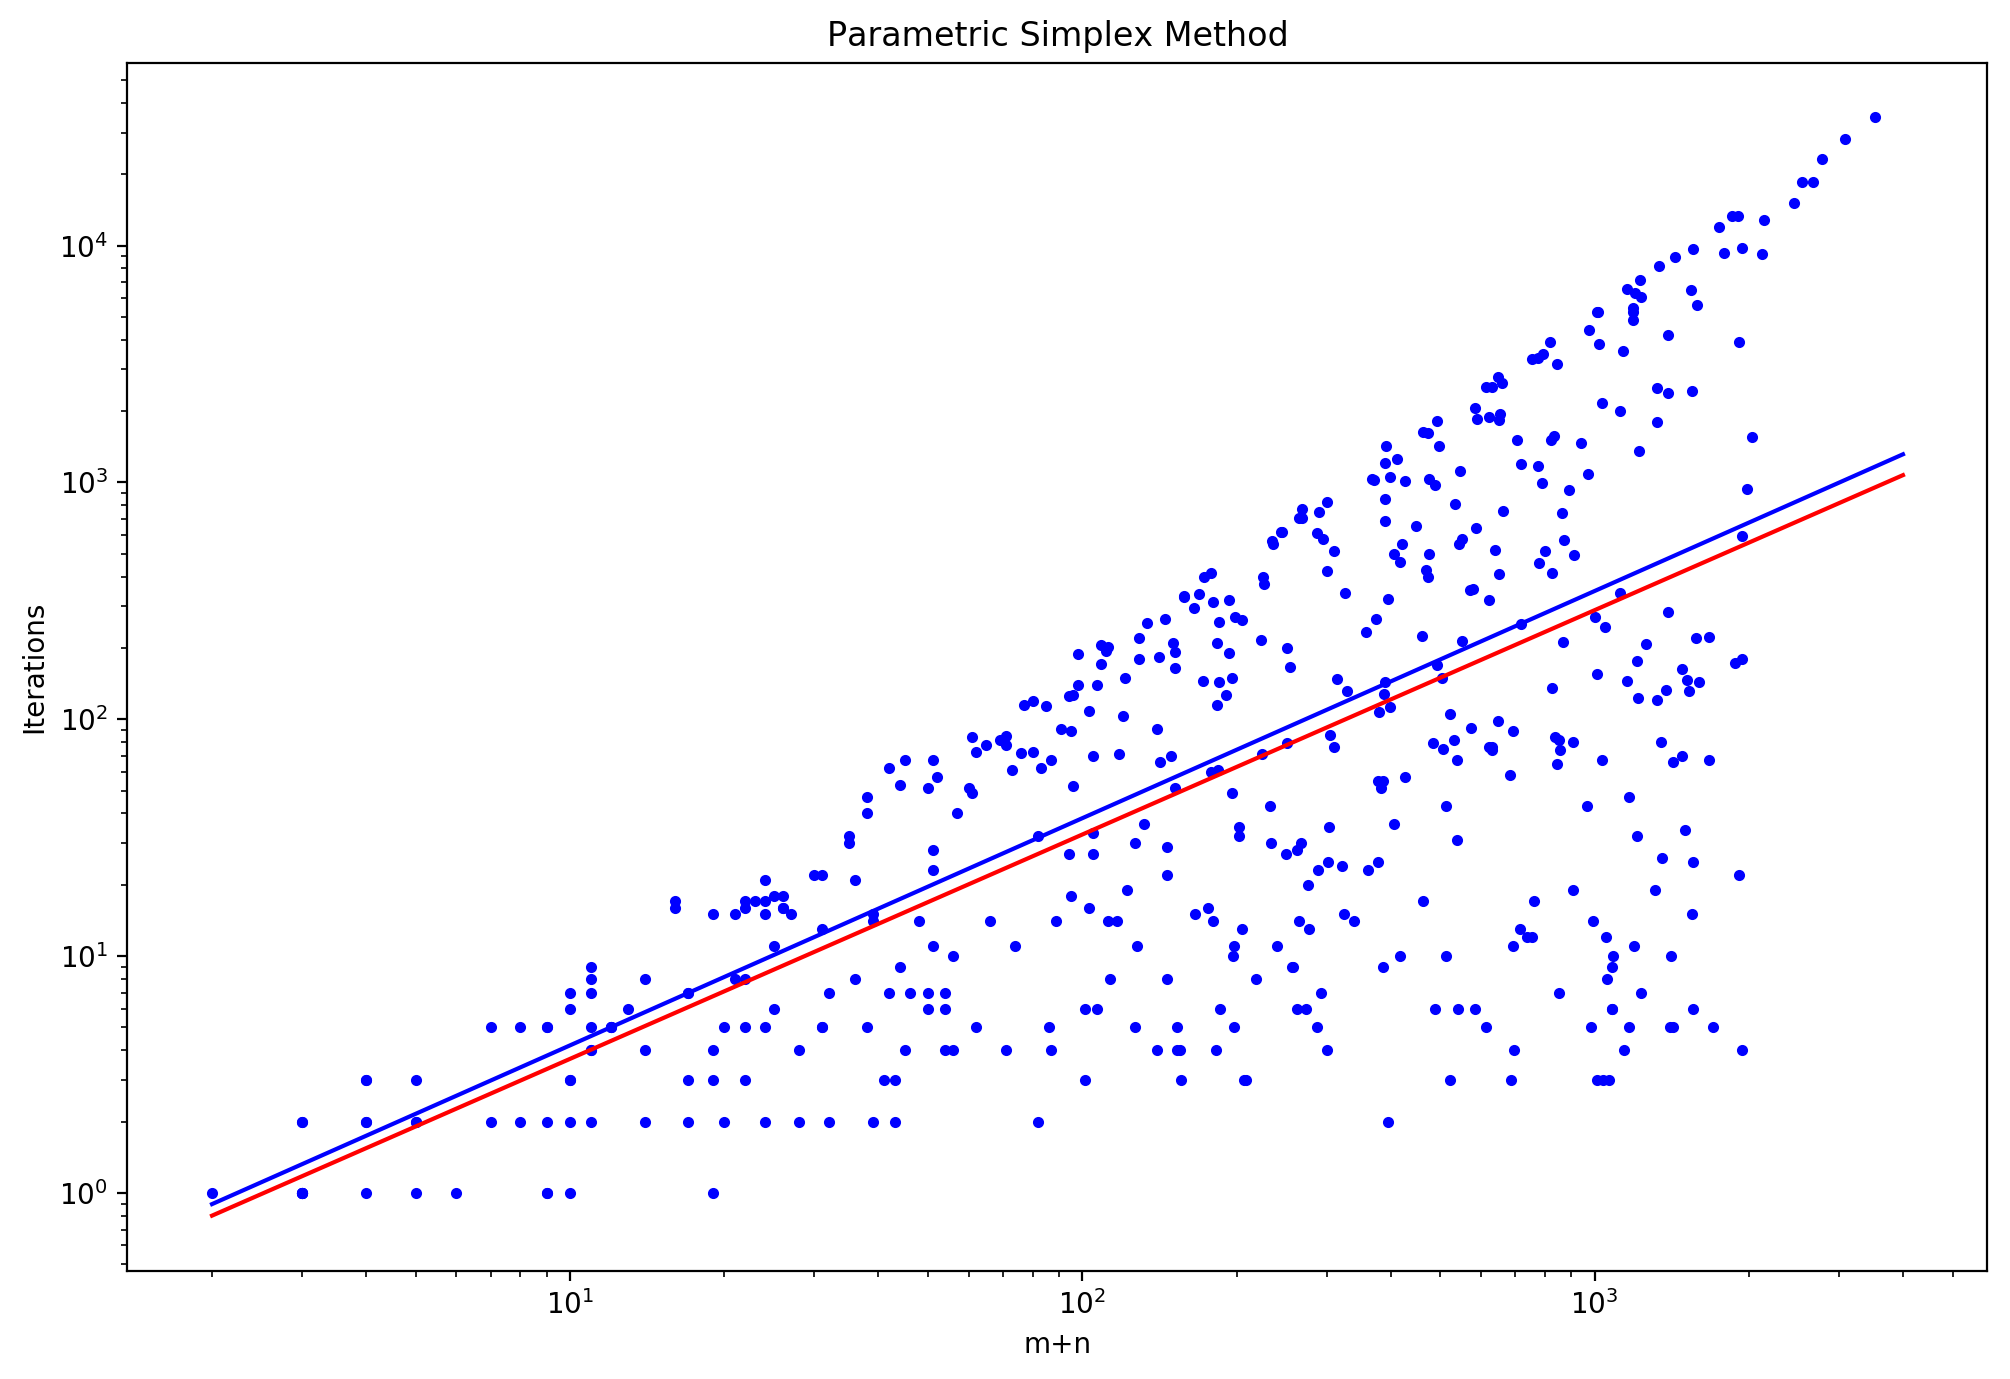

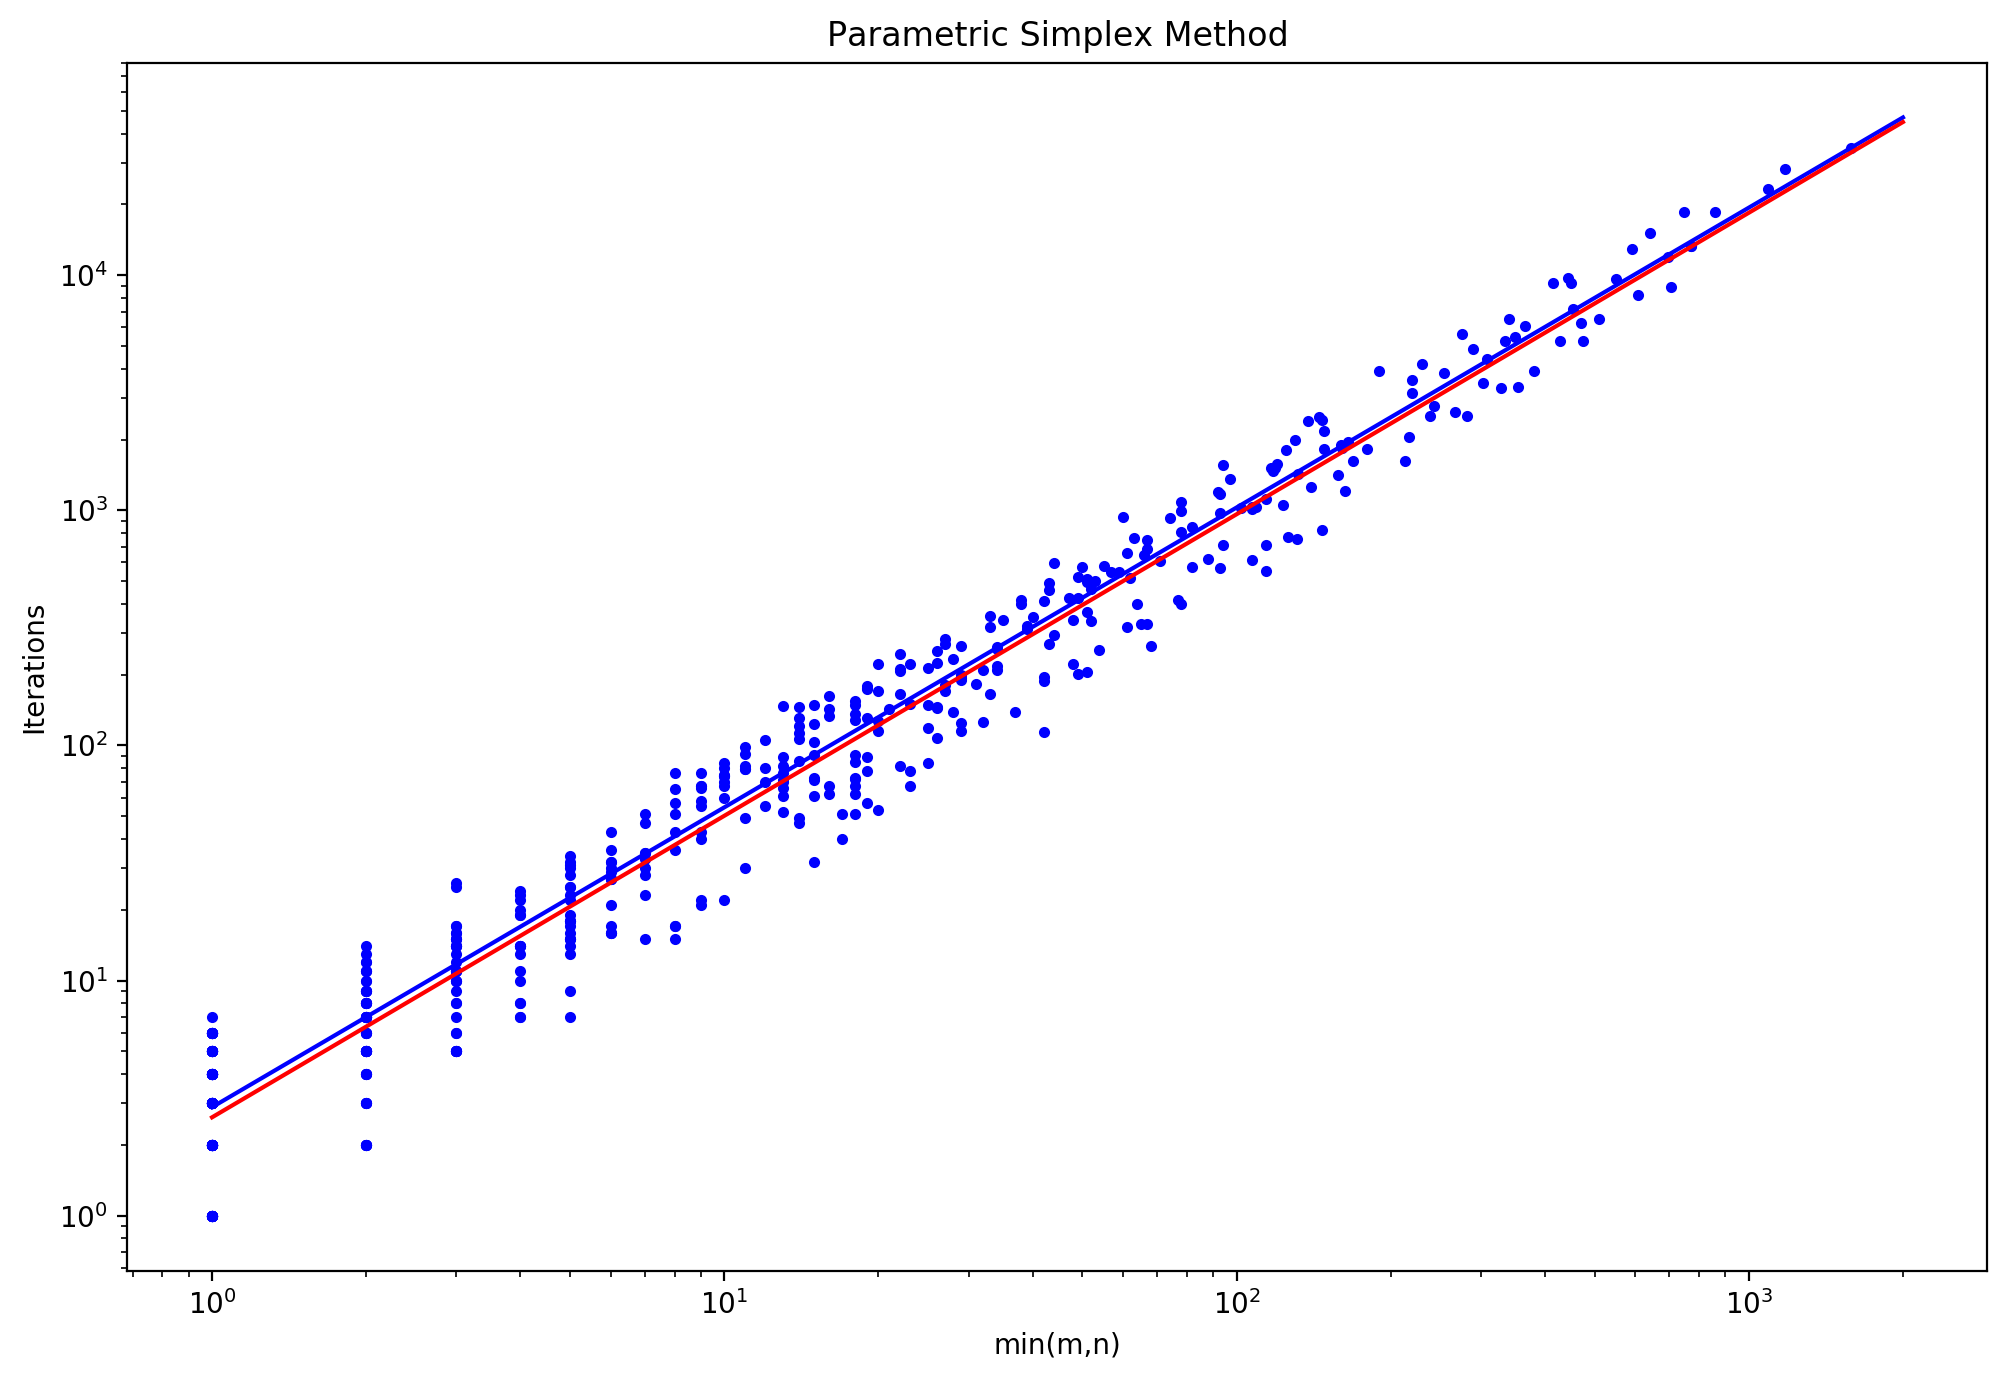

In [778]:
figure(3, figsize=(12, 8), dpi= 200)
loglog(ms+ns,iters,'b.')
xlabel('m+n')
ylabel('Iterations')
title('Parametric Simplex Method')
loglog([2, 4000], [a11*2**b11, a11*4000**b11], 'b-')
loglog([2, 4000], [a21*2**b21, a21*4000**b21], 'r-')
show()

figure(4, figsize=(12, 8), dpi= 200)
loglog(minimum(ms,ns),iters,'b.')
xlabel('min(m,n)')
ylabel('Iterations')
title('Parametric Simplex Method')
loglog([1, 2000], [a12*1**b12, a12*2000**b12], 'b-')
loglog([1, 2000], [a22*1**b22, a22*2000**b22], 'r-')
show()